In [42]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Questions:
Q1. What is the overall sales trend?

Q2. Which are the Top 10 products by sales?

Q3. Which are the Most Selling Products?

Q4. Which is the most preferred Ship Mode?

Q5. Which are the Most Profitable Category and Sub-Category?



In [43]:
#Importing the data
df=pd.read_excel('/content/drive/MyDrive/Data sets/superstore_sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [44]:
#Understanding the data
df.shape #Gives the number of (rows,columns)

(51290, 21)

In [45]:
df.columns #to know the columns in the dataset

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [46]:
df.info() #to set the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [47]:
#Checking for missing values
df.isnull().sum()
#no missing values

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [48]:
#Getting description of the dataset
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [49]:
#Getting the correlation between columns
df.corr()

,sales,quantity,discount,profit,shipping_cost,year
sales,1.000000,0.313577,-0.086722,0.485939,0.768073,-0.002905
quantity,0.313577,1.000000,-0.019875,0.104743,0.272649,-0.005049
discount,-0.086722,-0.019875,1.000000,-0.316375,-0.079055,-0.005894
profit,0.485939,0.104743,-0.316375,1.000000,0.357033,0.002661
shipping_cost,0.768073,0.272649,-0.079055,0.357033,1.000000,-0.003137
year,-0.002905,-0.005049,-0.005894,0.002661,-0.003137,1.000000


# Exploratory Data Analysis

In [50]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [51]:
df['Month_year']=df['order_date'].apply(lambda x:x.strftime('%Y-%m'))
df['Month_year']

0        2011-01
1        2011-01
2        2011-01
3        2011-01
4        2011-01
          ...   
51285    2014-12
51286    2014-12
51287    2014-12
51288    2014-12
51289    2014-12
Name: Month_year, Length: 51290, dtype: object

**Q1. What is the overall sales trend?**


In [52]:
#Defining the month and sales
df_trend = df.groupby('Month_year').sum()['sales'].reset_index()

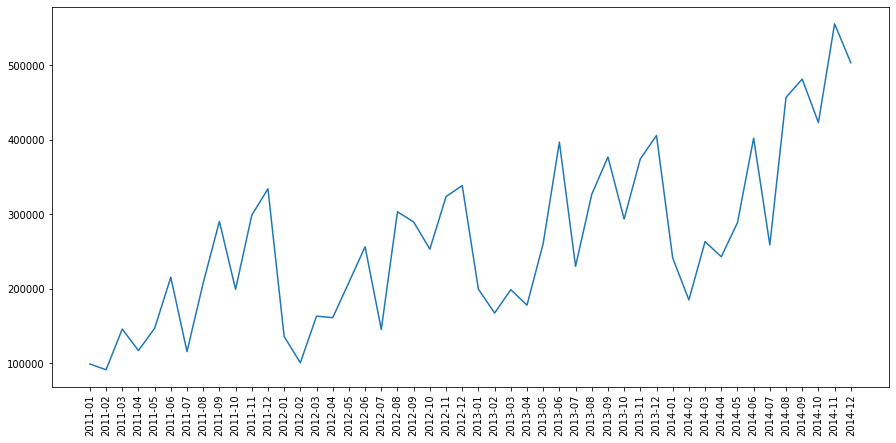

In [54]:
#Visualization
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
plt.plot(df_trend['Month_year'],df_trend['sales']) 
plt.show()

**Q2. What are the top 10 products by sales?**

In [59]:
#Product Names
prod = df.groupby('product_name').sum()['sales'].reset_index()
prod

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [69]:
#sorting 
prod_sales = pd.DataFrame(prod.sort_values('sales',ascending=False))

In [70]:
#Getting the top 10 selling
prod_sales.head(10)

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


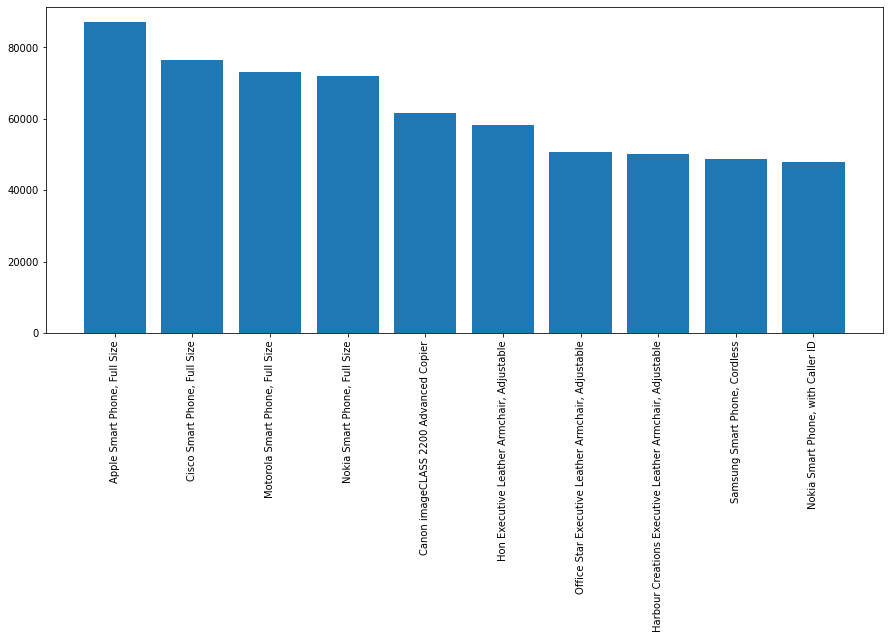

In [76]:
#Visualization
plt.figure(figsize=(15,6))
plt.bar(prod_sales['product_name'].head(10),prod_sales['sales'].head(10))
plt.xticks(rotation=90)
plt.show()

**Q3. Which are the Most Selling Products?**

In [94]:
#grouping the data to find the most sold item
qunt_prod=df.groupby('product_name').sum()['quantity'].reset_index()
qunt_prod.head(10)

,product_name,quantity
0,"""While you Were Out"" Message Book, One Form pe...",8
1,"#10 Gummed Flap White Envelopes, 100/Box",11
2,#10 Self-Seal White Envelopes,10
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
5,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",21
6,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",13
7,#6 3/4 Gummed Flap White Envelopes,9
8,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",14
9,1/4 Fold Party Design Invitations & White Enve...,7


In [95]:
#Sorting
df3= pd.DataFrame(qunt_prod.sort_values('quantity',ascending=False))
df3.head(10)

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


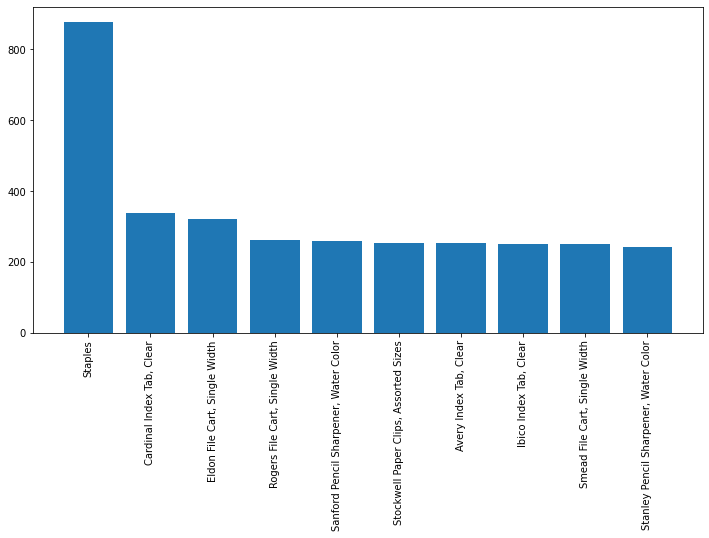

In [97]:
#Visualization
plt.figure(figsize=(12,6))
plt.bar(df3['product_name'].head(10),df3['quantity'].head(10))
plt.xticks(rotation=90)
plt.show()

**Q4. Which is the most preferred Ship Mode?**

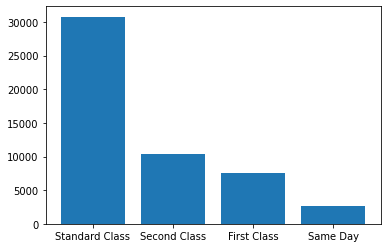

In [108]:
#Visualizaion
counts = df['ship_mode'].value_counts()
plt.bar(counts.index,counts.values)
plt.show()

**Q5. Which are the Most Profitable Category and Sub-Category?**

In [115]:
#Grouping
df4 = df.groupby(['category','sub_category']).sum()['profit'].reset_index()
df4.head(10)

,category,sub_category,profit
0,Furniture,Bookcases,161924.4195
1,Furniture,Chairs,141973.7975
2,Furniture,Furnishings,46967.4255
3,Furniture,Tables,-64083.3887
4,Office Supplies,Appliances,141680.5894
5,Office Supplies,Art,57953.9109
6,Office Supplies,Binders,72449.8460
7,Office Supplies,Envelopes,29601.1163
8,Office Supplies,Fasteners,11525.4241
9,Office Supplies,Labels,15010.5120


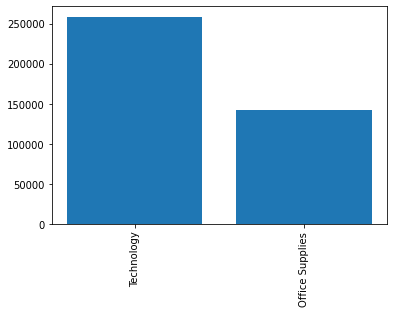

In [124]:
#Sorting & Visualization
df5 = pd.DataFrame(df4.sort_values(['category','profit'],ascending=False))
plt.bar(df5['category'].head(10),df5  ['profit'].head(10))
plt.xticks(rotation=90)
plt.show()

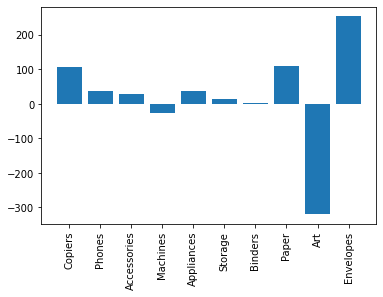

In [123]:
plt.bar(df5['sub_category'].head(10),df['profit'].head(10))
plt.xticks(rotation=90)
plt.show()